<a href="https://colab.research.google.com/github/Obaidsajjad/NLP_Review_Semtiment_Analysis/blob/main/Movie_Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import string
import gensim
from gensim.utils import simple_preprocess
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
punct = string.punctuation

In [14]:
data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Text Preprocessing
1. Removing Duplicates
2. Removing html
3. Lower Casing
4. Removing Puntuation
5. Removing Single Characer and Multi Spaces
6. Training Word2Vec
7. Tokenization
8. Padding

In [16]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [15]:
def remove_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [17]:
def preprocess_text(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''

    sentence = sen.lower()

    # Remove html tags
    sentence = remove_tags(sentence)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    return sentence
data['review'] = data['review'].apply(lambda x: preprocess_text(x))

In [18]:
# creating word list for training word2Vec

words = []
corpus = data['review']
# raw_sent = sent_tokenize(corpus)
for sent in corpus:
  words.append(simple_preprocess(sent))
# words

In [19]:
# Tokenizing Data
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['review'])

tokenized_text=tokenizer.texts_to_sequences(data['review'])

In [20]:
tokenized_text[0]

[24,
 3,
 1,
 73,
 2051,
 42,
 1041,
 9,
 96,
 146,
 37,
 3046,
 393,
 17,
 228,
 25,
 3168,
 28,
 21,
 200,
 11,
 8,
 5,
 609,
 43,
 587,
 14,
 64,
 1,
 84,
 145,
 9,
 3198,
 64,
 40,
 3046,
 10,
 87,
 2,
 133,
 3,
 558,
 57,
 262,
 7,
 200,
 33,
 1,
 643,
 138,
 1707,
 64,
 8,
 5,
 19,
 114,
 13,
 1,
 2303,
 36,
 8,
 114,
 2549,
 52,
 14,
 4,
 1436,
 370,
 36,
 558,
 87,
 5,
 3771,
 7,
 1,
 352,
 354,
 3,
 1,
 643,
 6,
 5,
 429,
 3046,
 11,
 9,
 5,
 1,
 353,
 4,
 1,
 2510,
 1032,
 6,
 2675,
 1393,
 18,
 514,
 30,
 4592,
 2440,
 3,
 1,
 1170,
 111,
 26,
 1,
 23,
 2870,
 2,
 383,
 32,
 5,
 19,
 294,
 18,
 1,
 4838,
 2864,
 514,
 5,
 337,
 4,
 103,
 4958,
 2404,
 2,
 48,
 32,
 321,
 2,
 21,
 107,
 220,
 237,
 56,
 130,
 1,
 279,
 1312,
 3,
 1,
 114,
 5,
 674,
 4,
 1,
 190,
 9,
 6,
 263,
 111,
 73,
 272,
 567,
 2988,
 815,
 181,
 1281,
 4093,
 13,
 2446,
 1206,
 815,
 1409,
 815,
 861,
 3046,
 150,
 935,
 182,
 1,
 84,
 393,
 119,
 206,
 3198,
 64,
 11,
 32,
 1588,
 6,
 10,
 2211,
 408,


In [21]:
# Padding all reviews to fixed length 128

maxlen = max([len(x) for x in tokenized_text])
print(maxlen)

padded_data = pad_sequences(tokenized_text, padding='post', maxlen=100)

2003


In [22]:
X = padded_data[:,:]
y = data['sentiment']

y = le.fit_transform(y)

In [23]:
# training word2Vec model

w2v_model = gensim.models.Word2Vec(window=10, min_count=2 )
w2v_model

w2v_model.build_vocab(words)
w2v_model.train(words, total_examples=w2v_model.corpus_count, epochs=10)

(83469061, 108908410)

In [24]:
w2v_model.wv.key_to_index

{'the': 0,
 'and': 1,
 'of': 2,
 'to': 3,
 'is': 4,
 'it': 5,
 'in': 6,
 'this': 7,
 'that': 8,
 'was': 9,
 'as': 10,
 'movie': 11,
 'for': 12,
 'with': 13,
 'but': 14,
 'film': 15,
 'you': 16,
 'on': 17,
 'not': 18,
 'he': 19,
 'are': 20,
 'his': 21,
 'have': 22,
 'one': 23,
 'be': 24,
 'all': 25,
 'at': 26,
 'they': 27,
 'by': 28,
 'an': 29,
 'who': 30,
 'so': 31,
 'from': 32,
 'like': 33,
 'there': 34,
 'or': 35,
 'just': 36,
 'her': 37,
 'out': 38,
 'about': 39,
 'if': 40,
 'has': 41,
 'what': 42,
 'some': 43,
 'good': 44,
 'can': 45,
 'when': 46,
 'more': 47,
 'very': 48,
 'she': 49,
 'up': 50,
 'no': 51,
 'time': 52,
 'my': 53,
 'even': 54,
 'would': 55,
 'which': 56,
 'only': 57,
 'story': 58,
 'really': 59,
 'see': 60,
 'their': 61,
 'had': 62,
 'me': 63,
 'well': 64,
 'we': 65,
 'were': 66,
 'than': 67,
 'much': 68,
 'bad': 69,
 'get': 70,
 'been': 71,
 'other': 72,
 'do': 73,
 'people': 74,
 'great': 75,
 'will': 76,
 'also': 77,
 'into': 78,
 'because': 79,
 'how': 80,
 'him

In [25]:
vocab_size = len(tokenizer.word_index)+1
vocab_size

101399

In [26]:
#Splitting Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train.shape

(39665, 100)

In [28]:
w2v_model.wv

In [30]:
#creating word embeddings

embedding_dim = 100
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

# LSTM Model Building & Training

In [33]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=100))
model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          12979072  
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 13110785 (50.01 MB)
Trainable params: 13110785 (50.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
X_train.shape

(39665, 100)

In [34]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_split=0.2,verbose=1)

Epoch 1/10
248/248 [==============================] - 102s 391ms/step - loss: 0.4506 - accuracy: 0.7774 - val_loss: 0.3412 - val_accuracy: 0.8513
Epoch 2/10
248/248 [==============================] - 91s 368ms/step - loss: 0.2968 - accuracy: 0.8790 - val_loss: 0.3295 - val_accuracy: 0.8578
Epoch 3/10
248/248 [==============================] - 88s 356ms/step - loss: 0.2555 - accuracy: 0.8960 - val_loss: 0.3534 - val_accuracy: 0.8548
Epoch 4/10
248/248 [==============================] - 84s 339ms/step - loss: 0.2247 - accuracy: 0.9107 - val_loss: 0.3779 - val_accuracy: 0.8518
Epoch 5/10
248/248 [==============================] - 88s 353ms/step - loss: 0.1954 - accuracy: 0.9243 - val_loss: 0.4092 - val_accuracy: 0.8417
Epoch 6/10
248/248 [==============================] - 88s 355ms/step - loss: 0.1733 - accuracy: 0.9350 - val_loss: 0.4240 - val_accuracy: 0.8431
Epoch 7/10
248/248 [==============================] - 86s 346ms/step - loss: 0.1569 - accuracy: 0.9414 - val_loss: 0.4805 - val_a

In [35]:
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob).astype(int)

310/310 [==============================] - 11s 36ms/step


# Evaluation Of The Model

1. Loss
2. Accuracy
3. Recall
4. Precision
5. F1 Score
6. Confusion Metrix

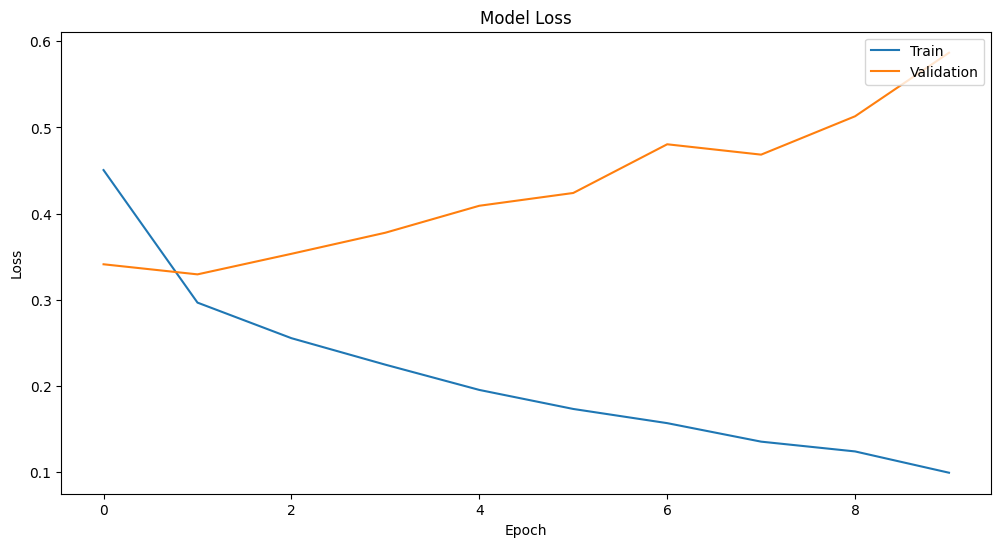

In [36]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

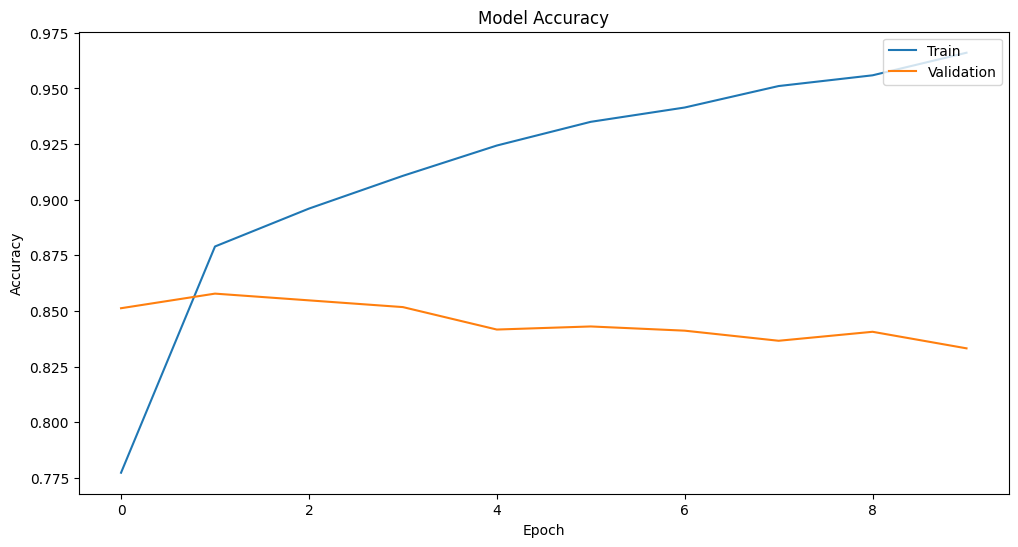

In [37]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

In [38]:
#Evaluation On Test Data
loss,accuracy=model.evaluate(X_test,y_test)
print(f"Test Loss:{loss}")
print(f"Test accuracy:{accuracy}")

310/310 [==============================] - 11s 34ms/step - loss: 0.5819 - accuracy: 0.8351
Test Loss:0.5819022059440613
Test accuracy:0.8351315855979919


In [39]:
# Compute metrics
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:")
print(conf_matrix)

F1 Score: 0.8313215722686476
Recall: 0.8093611892326236
Precision: 0.8545068928950159
Confusion Matrix:
[[4253  686]
 [ 949 4029]]


In [40]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))